In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve


In [2]:
train_df = pd.read_csv('/kaggle/input/neural-net-nexus/train.csv')  
test_df = pd.read_csv('/kaggle/input/neural-net-nexus/test.csv')
sample_submission = pd.read_csv('/kaggle/input/neural-net-nexus/sample_submission.csv')

In [3]:
print(train_df.head())
print(test_df.head())
print(sample_submission.head())

    Age  HB (gm/dl)  ESR(mm)  WBC(TC) (/cumm)  Neutrophils (%)  \
0  14.0        11.4     28.0           4200.0               57   
1  26.0        12.2     43.0           4700.0               77   
2  42.0        14.9    103.0          19800.0               82   
3  35.0        13.9     12.0           9700.0               88   
4   8.0        10.0     28.0          10600.0               46   

   lymphocytes (%)  Monocytes (%)  Eosinophils (%)  Cir Eosinophils (/cumm)  \
0               36            5.0              2.0                     84.0   
1               19            3.0              1.0                     47.0   
2               15            2.0              1.0                    198.0   
3               10            1.0              1.0                     97.0   
4               42            2.0             10.0                   1060.0   

   RBC (m/ul)  ...  Platelete(PC)(/cumm)  MPV (fl)  PCT (%)  \
0        4.64  ...              167000.0      10.3     0.07   
1 

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

In [4]:
train_df = train_df.drop(columns=[col for col in train_df.columns if "Unnamed" in col])

In [5]:
print(train_df.head())

    Age  HB (gm/dl)  ESR(mm)  WBC(TC) (/cumm)  Neutrophils (%)  \
0  14.0        11.4     28.0           4200.0               57   
1  26.0        12.2     43.0           4700.0               77   
2  42.0        14.9    103.0          19800.0               82   
3  35.0        13.9     12.0           9700.0               88   
4   8.0        10.0     28.0          10600.0               46   

   lymphocytes (%)  Monocytes (%)  Eosinophils (%)  Cir Eosinophils (/cumm)  \
0               36            5.0              2.0                     84.0   
1               19            3.0              1.0                     47.0   
2               15            2.0              1.0                    198.0   
3               10            1.0              1.0                     97.0   
4               42            2.0             10.0                   1060.0   

   RBC (m/ul)  HTC/PCV (%)  MCV (fl)  MCH (pg)  MCHC (g/dl)  RDW  (%)  \
0        4.64         37.0      79.7      24.6         

In [8]:
print(train_df.isna().sum())  
print(test_df.isna().sum())  

Age                        3
HB (gm/dl)                 0
ESR(mm)                    0
WBC(TC) (/cumm)            1
Neutrophils (%)            0
lymphocytes (%)            0
Monocytes (%)              2
Eosinophils (%)            2
Cir Eosinophils (/cumm)    3
RBC (m/ul)                 2
HTC/PCV (%)                0
MCV (fl)                   3
MCH (pg)                   1
MCHC (g/dl)                0
RDW  (%)                   1
PDW (fl)                   0
Platelete(PC)(/cumm)       2
MPV (fl)                   1
PCT (%)                    0
Class Identification       0
dtype: int64
Age                        0
HB (gm/dl)                 0
ESR(mm)                    2
WBC(TC) (/cumm)            0
Neutrophils (%)            0
lymphocytes (%)            0
Monocytes (%)              0
Eosinophils (%)            0
Cir Eosinophils (/cumm)    0
RBC (m/ul)                 0
HTC/PCV (%)                0
MCV (fl)                   0
MCH (pg)                   0
MCHC (g/dl)                0
R

In [9]:
numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

In [10]:
train_df[numerical_cols] = train_df[numerical_cols].fillna(train_df[numerical_cols].median())
test_df[numerical_cols] = test_df[numerical_cols].fillna(test_df[numerical_cols].median())

In [11]:
print(train_df.isna().sum())  
print(test_df.isna().sum())   

Age                        0
HB (gm/dl)                 0
ESR(mm)                    0
WBC(TC) (/cumm)            0
Neutrophils (%)            0
lymphocytes (%)            0
Monocytes (%)              0
Eosinophils (%)            0
Cir Eosinophils (/cumm)    0
RBC (m/ul)                 0
HTC/PCV (%)                0
MCV (fl)                   0
MCH (pg)                   0
MCHC (g/dl)                0
RDW  (%)                   0
PDW (fl)                   0
Platelete(PC)(/cumm)       0
MPV (fl)                   0
PCT (%)                    0
Class Identification       0
dtype: int64
Age                        0
HB (gm/dl)                 0
ESR(mm)                    0
WBC(TC) (/cumm)            0
Neutrophils (%)            0
lymphocytes (%)            0
Monocytes (%)              0
Eosinophils (%)            0
Cir Eosinophils (/cumm)    0
RBC (m/ul)                 0
HTC/PCV (%)                0
MCV (fl)                   0
MCH (pg)                   0
MCHC (g/dl)                0
R

In [12]:
train_df['Class Identification'] = train_df['Class Identification'].map({'Positive': 1, 'Negative': 0})

In [13]:
print(train_df['Class Identification'].head())

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Class Identification, dtype: float64


In [14]:
X = train_df.drop(columns=['Class Identification'])
y = train_df['Class Identification']

In [15]:
print(X.shape)
print(y.shape)

(529, 19)
(529,)


In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

(423, 19) (106, 19)
(423,) (106,)


In [18]:
train_df = train_df.dropna(subset=['Class Identification'])  
X = train_df.drop(columns=['Class Identification'])  
y = train_df['Class Identification'] 

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']

In [21]:
print("Training Accuracy:", model.score(X_train, y_train))

Training Accuracy: 1.0


In [22]:
y_pred = model.predict(X_valid)
y_prob = model.predict_proba(X_valid)[:, 1] 

In [23]:
roc_auc = roc_auc_score(y_valid, y_prob)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_valid, y_pred))

ROC AUC Score: 0.929820301117047

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        71
         1.0       0.77      0.69      0.73        29

    accuracy                           0.85       100
   macro avg       0.82      0.80      0.81       100
weighted avg       0.85      0.85      0.85       100



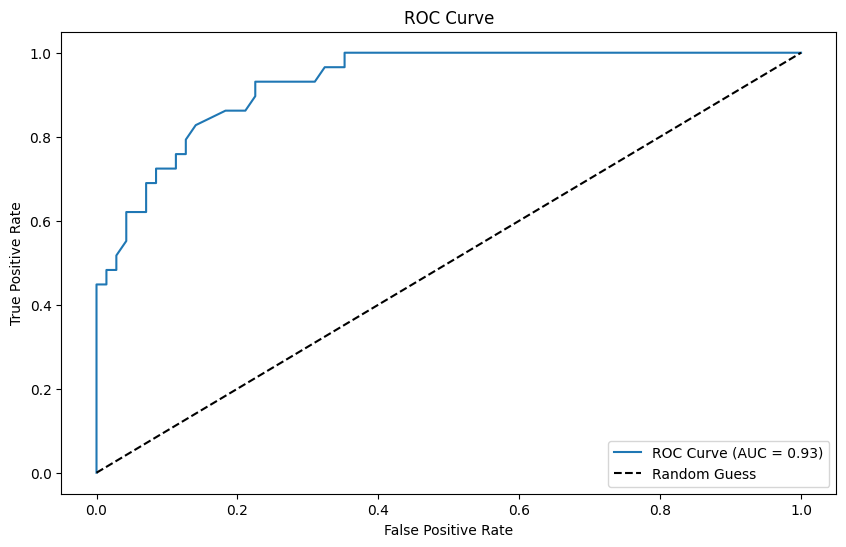

In [24]:
fpr, tpr, _ = roc_curve(y_valid, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [30]:
test_predictions = model.predict_proba(test_df)[:, 1]

In [32]:
print(f"Shape of test_df: {test_df.shape}")
print(f"Shape of sample_submission: {sample_submission.shape}")

Shape of test_df: (100, 19)
Shape of sample_submission: (7, 2)


In [35]:
print(test_df.columns)

Index(['Age', 'HB (gm/dl)', 'ESR(mm)', 'WBC(TC) (/cumm)', 'Neutrophils (%)',
       'lymphocytes (%)', 'Monocytes (%)', 'Eosinophils (%)',
       'Cir Eosinophils (/cumm)', 'RBC (m/ul)', 'HTC/PCV (%)', 'MCV (fl)',
       'MCH (pg)', 'MCHC (g/dl)', 'RDW  (%)', 'PDW (fl)',
       'Platelete(PC)(/cumm)', 'MPV (fl)', 'PCT (%)'],
      dtype='object')


In [36]:
sample_submission = pd.DataFrame({'Id': range(1, len(test_df) + 1), 'Prediction': np.nan})

In [37]:
sample_submission['Prediction'] = test_predictions

In [38]:
sample_submission.to_csv('submission.csv', index=False)

In [40]:
import numpy as np
from sklearn.metrics import precision_recall_curve

In [41]:
train_predictions = model.predict_proba(X_train)[:, 1]

In [42]:
precision, recall, thresholds = precision_recall_curve(y_train, train_predictions)

In [43]:
f1_scores = 2 * (precision * recall) / (precision + recall)

In [44]:
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

In [45]:
print(f"Optimal Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1_score}")

Optimal Threshold: 0.62
Best F1 Score: 1.0


In [46]:
test_predictions_binary = ['Positive' if p >= best_threshold else 'Negative' for p in test_predictions]

In [48]:
test_df['Id'] = test_df.index + 1
sample_submission = pd.DataFrame({
    'Id': test_df['Id'],
    'Prediction': test_predictions_binary
})

In [51]:
sample_submission.to_csv('submission.csv', index=False)

In [52]:
import os

file_path = '/kaggle/working/submission1.csv'

if os.path.exists(file_path):
    os.remove(file_path)

In [53]:
print(sample_submission['Prediction'].dtype)

object


In [57]:
sample_submission['Prediction'] = sample_submission['Prediction'].map({0: 'Negative', 1: 'Positive'})

In [59]:
print(sample_submission['Prediction'].dtype)

object


In [60]:
sample_submission.to_csv('submission.csv', index=False)

In [61]:
threshold = 0.62
sample_submission['Prediction'] = sample_submission['Prediction'].apply(lambda x: 'Positive' if x >= threshold else 'Negative')

In [62]:
print(sample_submission['Prediction'].dtype)

object


In [64]:
sample_submission.to_csv('submission.csv', index=False)